## Sample marked 5 10 ps avg

In [60]:
#import libraries

import numpy as np
from skimage import io
import mplcursors
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 16
plt.rcParams['figure.figsize'] = (10, 5)
# plt.style.use('seaborn-poster')
# plt.rcParams["figure.figsize"] = (10,5)
from scipy.optimize import least_squares
plt.style.use('dark_background')

In [61]:
def TA_2D_contour(data):
    
    df = pd.read_csv(data)    #Import data
    df_time = pd.Series(df.columns) #take out the column name which contains time info
    df_lambda = pd.Series(df.iloc[:,0])  #take out wavelength info from the first row
    df3 = df.set_index(df.iloc[:, 0])  #Set the first column as index
    df3 = df3.iloc[: , 1:]                  #drop the first column
    df3.index.names = ['Wavelength']   #rename index column name to wavelength
    df4 = df3.fillna(0)  #fill nan values with 0
    
    # converting string column values to float
    df4_columns = pd.Series(df4.columns)
    df4_columns_num = df4_columns.apply(pd.to_numeric, errors='coerce')
    df4.columns = df4_columns_num
    
    return df4

In [62]:
#function for plotting data

def Plotting_2D_contour(df):
    #plotting the data

    x1 = df.columns
    y1 = df.index
    z1 = df
    X1,Y1 = np.meshgrid(x1,y1)
    Z1 = z1
    img = plt.contourf(X1,Y1,Z1,50, cmap='jet', vmin=-8, vmax=8 )
    plt.colorbar(img)
    plt.xlabel('Time(fs)')
    plt.ylabel('Wavelength(nm)')
    
    return 

In [63]:
data = "C:/Users/nita8/OneDrive - University of Toronto/Data from MPSD_CFEL/Nita/Castellano/30Mar21/Sample_marked5/Sample_marked_5_Sample1_pos1_10ps_515nm_234micron_300nJ_10fs_907_917ps.txt"
# data = 'TA_matrix_31Mar_10ps_10fs.txt'
df4 = TA_2D_contour(data)
df4_test = df4.iloc[1150:1810]

In [64]:
df4_test

,907000.0,907010.0,907020.0,907030.0,907040.0,907050.0,907060.0,907070.0,907080.0,907090.0,...,916910.0,916920.0,916930.0,916940.0,916950.0,916960.0,916970.0,916980.0,916990.0,917000.0
Wavelength,,,,,,,,,,,,,,,,,,,,,
520.452083,-0.449825,-0.302041,0.116997,-0.152922,-0.425598,0.249647,-0.276137,-0.167525,-0.206716,0.077693,...,0.936990,0.502701,0.232914,0.458174,0.417813,0.538579,0.570919,0.940733,0.299404,0.765175
520.708053,-0.517231,-0.066533,0.065256,-0.031284,-0.208978,-0.171245,-0.271558,-0.070721,-0.100495,-0.172574,...,0.466947,0.747153,0.389582,0.491162,0.758397,0.720473,0.463671,0.844131,0.482450,0.777823
520.964020,-0.413165,-0.131281,0.121280,-0.070384,-0.406889,0.072784,-0.576332,-0.046227,0.214263,0.100162,...,0.755223,0.602738,0.554952,0.558882,0.793195,0.446647,0.669949,1.098595,0.538773,1.039211
521.219985,-0.551843,0.219858,-0.016304,-0.167246,-0.368360,-0.020596,-0.429624,-0.113285,0.036518,-0.348890,...,0.886247,0.564920,0.405086,0.688644,0.498001,0.848054,0.592243,0.740897,0.665003,0.795776
521.475948,-0.486202,0.094866,-0.063453,0.010414,-0.121835,0.261333,-0.440156,-0.497189,0.113015,0.042630,...,0.716784,0.535176,0.526267,0.611415,0.729000,0.764597,0.669002,1.035923,0.548289,0.604932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691.424249,-1.565180,-1.017835,-1.651470,-1.631163,-1.474064,-1.288748,-1.376325,-1.401559,-1.810557,-0.996299,...,-1.061578,-1.446314,-1.851222,-1.769949,-1.456124,-1.981428,-1.496420,-1.763580,-1.422115,-1.123352
691.696158,-1.398797,-1.298290,-1.564988,-1.726634,-1.943282,-1.572817,-1.511468,-1.750827,-1.726468,-1.976980,...,-1.806798,-1.944801,-2.000350,-1.311632,-1.427119,-1.826870,-1.606945,-1.996206,-2.113812,-1.694088
691.968118,-2.083767,-1.974229,-2.068684,-1.884736,-1.395418,-1.743001,-1.675815,-1.979541,-1.114111,-1.651229,...,-1.990429,-1.721364,-2.091893,-2.107001,-2.259706,-1.775632,-1.931152,-2.042016,-1.653018,-1.588752


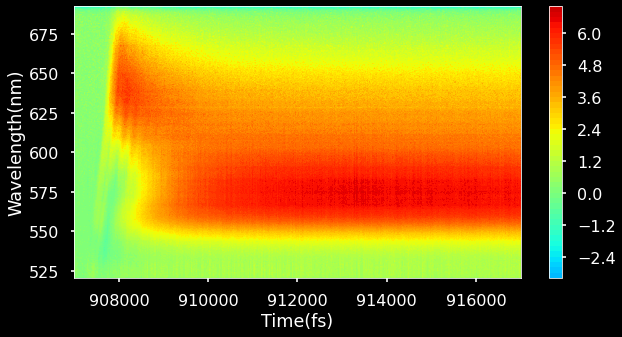

In [65]:
Plotting_2D_contour(df4_test)

In [66]:
# Plotting_2D_contour(df4) 560.150515 644.022703

In [67]:
list(df4.index)[650:]

[390.491928,
 390.759157,
 391.026343,
 391.293487,
 391.560589,
 391.827647,
 392.094664,
 392.361638,
 392.628569,
 392.895459,
 393.162306,
 393.429111,
 393.695875,
 393.962596,
 394.229276,
 394.495914,
 394.76251,
 395.029065,
 395.295578,
 395.56205,
 395.828481,
 396.09487,
 396.361219,
 396.627526,
 396.893792,
 397.160018,
 397.426202,
 397.692346,
 397.958449,
 398.224512,
 398.490534,
 398.756516,
 399.022457,
 399.288358,
 399.554219,
 399.82004,
 400.085821,
 400.351562,
 400.617263,
 400.882924,
 401.148546,
 401.414128,
 401.679671,
 401.945174,
 402.210637,
 402.476062,
 402.741447,
 403.006793,
 403.2721,
 403.537369,
 403.802598,
 404.067789,
 404.33294,
 404.598054,
 404.863128,
 405.128164,
 405.393162,
 405.658122,
 405.923043,
 406.187926,
 406.452771,
 406.717579,
 406.982348,
 407.247079,
 407.511773,
 407.776429,
 408.041047,
 408.305628,
 408.570172,
 408.834678,
 409.099147,
 409.363579,
 409.627974,
 409.892332,
 410.156652,
 410.420936,
 410.685184,
 410.9

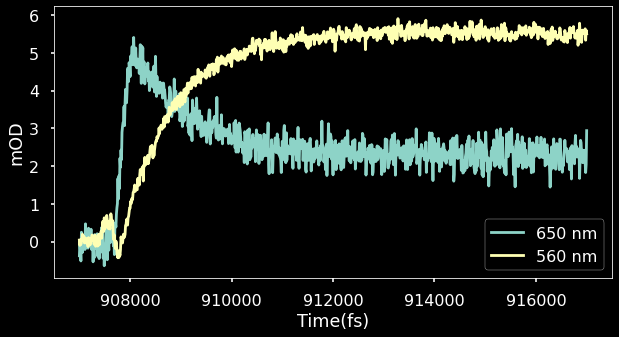

In [69]:
plt.plot(df4_test.iloc[df4_test.index == 650.107996].iloc[0], label='650 nm')
plt.plot(df4_test.iloc[df4_test.index == 560.150515].iloc[0], label='560 nm')
plt.xlabel('Time(fs)')
plt.ylabel('mOD')
plt.legend()

Text(0.5, 1.0, 'Raw kinetics plot')

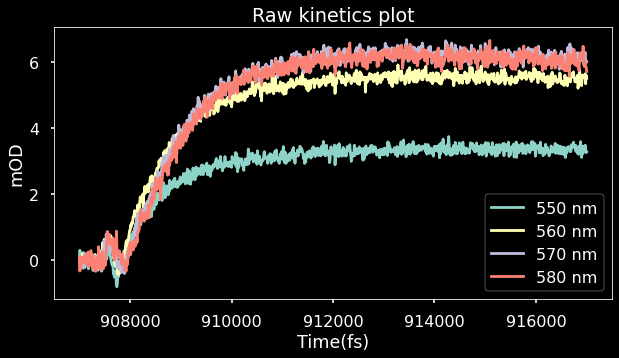

In [70]:
# 570.166244
plt.plot(df4_test.iloc[df4_test.index == 550.150449].iloc[0], label='550 nm')
plt.plot(df4_test.iloc[df4_test.index == 560.150515].iloc[0], label='560 nm')
plt.plot(df4_test.iloc[df4_test.index == 570.166244].iloc[0], label='570 nm')
plt.plot(df4_test.iloc[df4_test.index == 580.202452].iloc[0], label='580 nm')
plt.xlabel('Time(fs)')
plt.ylabel('mOD')
plt.legend()
plt.title("Raw kinetics plot")

In [71]:
# normalized kinetics plot

df4_test.iloc[df4_test.index == 550.150449].iloc[0].max()

3.7366009970841048

In [72]:
df4_norm_550 = [i/3.7366009970841048 for i in df4_test.iloc[df4_test.index == 550.150449].iloc[0]]

In [73]:

df4_norm_560 = [i/df4_test.iloc[df4_test.index == 560.150515].iloc[0].max() for i in df4_test.iloc[df4_test.index == 560.150515].iloc[0]]

df4_norm_570 = [i/df4_test.iloc[df4_test.index == 570.166244].iloc[0].max() for i in df4_test.iloc[df4_test.index == 570.166244].iloc[0]]

df4_norm_580 = [i/df4_test.iloc[df4_test.index == 580.202452].iloc[0].max() for i in df4_test.iloc[df4_test.index == 580.202452].iloc[0]]

Text(0.5, 1.0, 'Normalized kinetics plot')

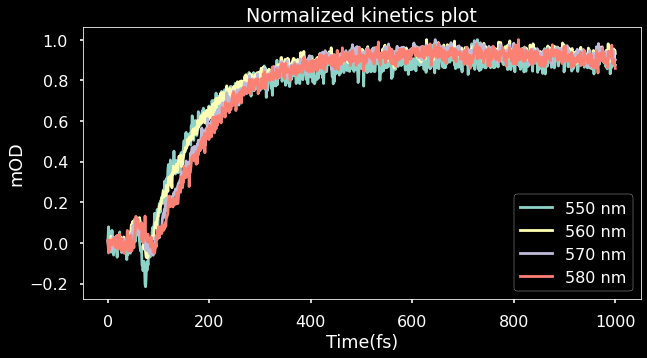

In [74]:
plt.plot(df4_norm_550, label='550 nm')
plt.plot(df4_norm_560, label='560 nm')
plt.plot(df4_norm_570, label='570 nm')
plt.plot(df4_norm_580, label='580 nm')
plt.xlabel('Time(fs)')
plt.ylabel('mOD')
plt.legend()
plt.title("Normalized kinetics plot")